### Neural Network Training - Parton Level
This notebook can be ran if one wishes to train again the Neural Networks used for the analysis at the parton level. This is not recommended due to the computational costs involved. Each notebook calls and trains a NN for each Wilson coefficient. The new model weights can be saved by setting the parameter `save` to `True` in the `train_test_model` function, and by specifying a destination folder to store the weights.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
import utils.partonicXS 
import utils.protonXS
import utils.tt_prod_ML4EFT
import utils.validation
from utils.funcs import parton_data_preprocessing, dataset_loader, MLP, train_test_model

LHAPDF 6.5.4 loading /Users/letizia/miniconda3/envs/aaa/share/LHAPDF/NNPDF23_lo_as_0130_qed/NNPDF23_lo_as_0130_qed_0000.dat
NNPDF23_lo_as_0130_qed PDF set, member #0, version 1; LHAPDF ID = 247000
LHAPDF 6.5.4 loading /Users/letizia/miniconda3/envs/aaa/share/LHAPDF/NNPDF23_lo_as_0130_qed/NNPDF23_lo_as_0130_qed_0000.dat
NNPDF23_lo_as_0130_qed PDF set, member #0, version 1; LHAPDF ID = 247000
All tests passed!


In [2]:
np.random.seed(0)

In [3]:
palette = sns.color_palette('Set2')
sns.set_palette(palette)
plt.rcParams['text.usetex'] = False
p = {'size': 18, 'family': 'cmr10'}

In [4]:
path_to_MC = '../data/PartonLevel/MonteCarlo_PL'
X, Xsm, Xc8dt2, y = parton_data_preprocessing('c8dt2', path_to_MC)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_size = 0.2
random_state = 42
batch_size = 200000
train_loader, test_loader = dataset_loader(X, y, test_size, random_state, batch_size, device)

In [6]:
model = MLP().to(device)

print(f"Model structure: {model}")

Model structure: MLP(
  (layer1): Linear(in_features=2, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=70, bias=True)
  (layer3): Linear(in_features=70, out_features=150, bias=True)
  (layer4): Linear(in_features=150, out_features=100, bias=True)
  (layer5): Linear(in_features=100, out_features=50, bias=True)
  (layer6): Linear(in_features=50, out_features=1, bias=True)
)


In [7]:
criterion = nn.BCELoss()
learning_rate = 0.0001
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

In [ ]:
train_loss, test_loss = train_test_model(model, criterion, optimizer, train_loader, test_loader, epochs=200)

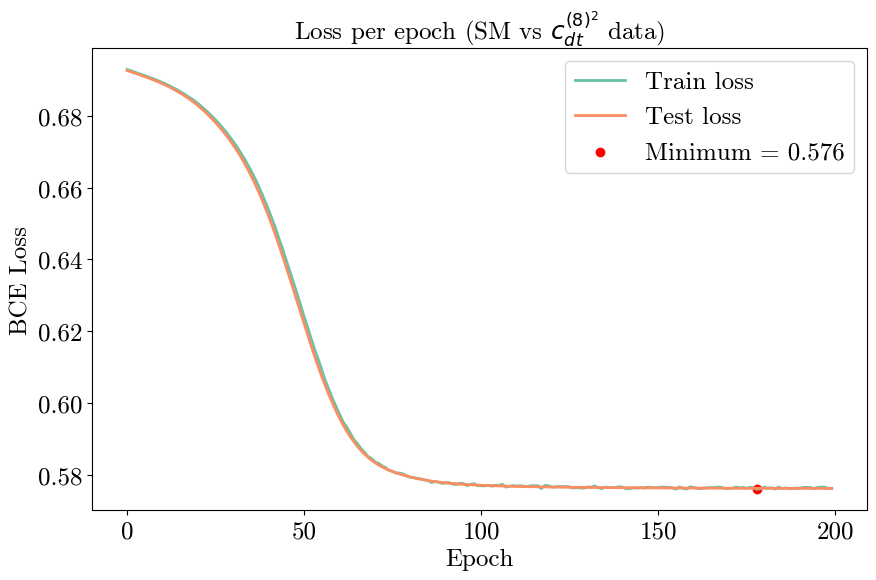

In [ ]:
min_loss = min(train_loss)
min_loss_index = train_loss.index(min_loss)

plt.figure(figsize=(10, 6))
plt.plot(train_loss, linewidth=2, label = 'Train loss')
plt.plot(test_loss, linewidth=2 , label = 'Test loss')
plt.scatter(min_loss_index, min_loss, color='red', label=f'Minimum = {min_loss:.3f}')
plt.xlabel('Epoch', fontdict=p)
plt.ylabel('BCE Loss', fontdict=p)
plt.legend(prop = p, loc='upper right')
plt.title('Loss per epoch (SM vs $c^{(8)^2}_{dt}$ data)', fontdict=p)
plt.xticks(**p)
plt.yticks(**p)
#plt.savefig('../plots/Loss_c8dt2_PartonLevel.pdf')
plt.show()